In [199]:
import numpy as np 
import matplotlib.pyplot as plt
import random
from math import sqrt, pi
from tqdm.notebook import tqdm_notebook
import time
import seaborn as sns


The Expected distance is 31.623 units
The actual distance is 33.428 units
The relative error is 5.71%


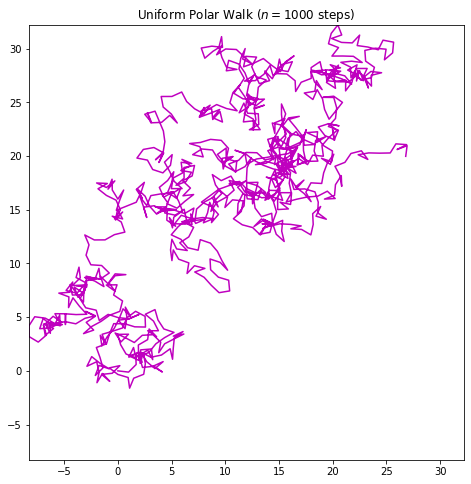

In [310]:
def uniform_polar_walk(n, theta_mean, theta_loc, tqdm_bool=False):
    # n = number of steps 
    x = np.zeros(n)
    y = np.zeros(n)

    for k in tqdm_notebook( range(1, n), desc='Walking {} Uniform Steps'.format(n) , disable=tqdm_bool):
        # choose theta uniformly 
        theta = np.random.uniform(theta_mean-2*theta_loc, theta_mean+2*theta_loc)
        omegas[k] = theta
        # then set x = cos(angle), y = sin(angle)
        x_new = np.cos(theta)
        y_new = np.sin(theta)
        # finally add x to the preious x and update
        x[k] = x[k-1]+x_new
        # same with y
        y[k] = y[k-1]+y_new 
        time.sleep(0.001)
    return x, y





#plotting stuff:
n = 1000
theta_mean = 0
theta_loc = np.pi/2
x, y = uniform_polar_walk(n, theta_mean, theta_loc)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.plot(x, y, c='m',)



plt.xlim([min(min(x),min(y)), max(max(x),max(y))])
plt.ylim([min(min(x),min(y)), max(max(x),max(y))])


expected_distance = round(np.sqrt(n),3)
actual_distance = round(np.sqrt(x[-1]**2 + y[-1]**2), 3)

print('The Expected distance is {} units'.format(expected_distance))
print('The actual distance is {} units'.format(actual_distance))
print('The relative error is {}%'.format(round(100*((actual_distance-expected_distance)/expected_distance), 2)))



plt.title("Uniform Polar Walk ($n = " + str(n) + "$ steps)")
plt.show()

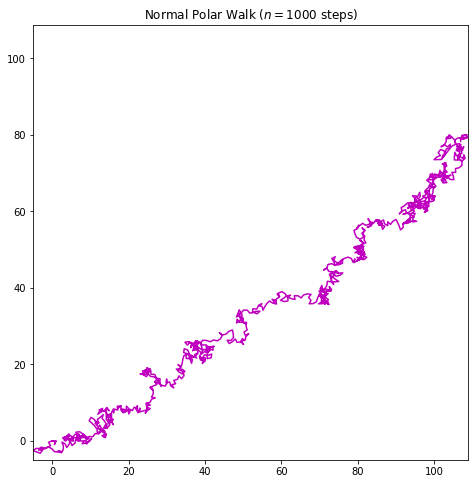

The Expected distance is 115.95 units
The actual distance is 132.461 units
The relative error is 14.24%


In [311]:
def normal_polar_walk(n, theta_mean, theta_loc, tqdm_bool=False):
    # n = number of steps 
    s = np.zeros(n)
    t = np.zeros(n)

    for k in tqdm_notebook(range(1, n), desc='Walking {} Normal Steps'.format(n) , disable=tqdm_bool):
        # choose theta normal-dist between -pi and pi 
        theta = np.random.normal(theta_mean, theta_loc)
        #angles[k] = theta
        # then set x = cos(angle), y = sin(angle)
        s_new = np.cos(theta)
        t_new = np.sin(theta)
        # finally add x to the preious x and update
        s[k] = s[k-1]+s_new
        # same with y
        t[k] = t[k-1]+t_new   
        time.sleep(0.001)
    return s, t




# set variables ------------------
n = 1000
theta_mean = np.pi/4
theta_loc = np.pi/1.5
s, t = normal_polar_walk(n, theta_mean, theta_loc)
expected_distance = round(np.sqrt(n*(1+n*np.exp(-(theta_loc)**2))), 3)
actual_distance = round(np.sqrt(s[-1]**2 + t[-1]**2), 3)


# plotting stuff:-------------

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.plot(s, t, c='m',)
plt.xlim([min(min(s),min(t)), max(max(s),max(t))])
plt.ylim([min(min(s),min(t)), max(max(s),max(t))])
plt.title("Normal Polar Walk ($n = " + str(n) + "$ steps)")
plt.show()



# extra printed stuff -------------
print('The Expected distance is {} units'.format(expected_distance))
print('The actual distance is {} units'.format(actual_distance))
print('The relative error is {}%'.format(round(100*((actual_distance-expected_distance)/expected_distance), 2)))

plt.show()

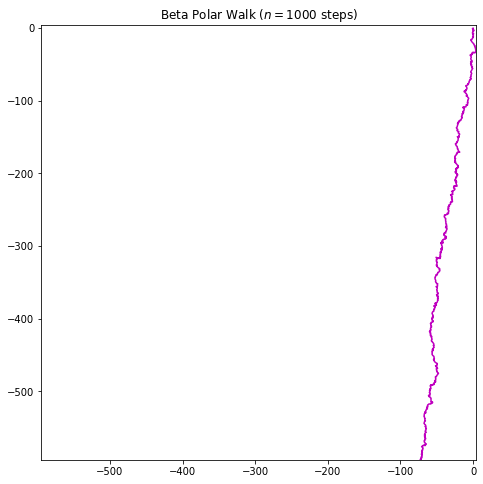

In [302]:
def beta_polar_walk(n, alpha, beta, tqdm_bool=False):
    # n = number of steps 
    q = np.zeros(n)
    r = np.zeros(n)

    for k in tqdm_notebook(range(1, n), desc='Walking {} Beta Steps'.format(n) , disable=tqdm_bool):
        omega = np.random.beta(alpha, beta)
        theta = 2*np.pi*omega
        # then set x = cos(angle), y = sin(angle)
        q_new = np.cos(theta)
        r_new = np.sin(theta)
        # finally add x to the previous x and update
        q[k] = q[k-1]+q_new
        # same with y
        r[k] = r[k-1]+r_new   
        time.sleep(0.001)
    return q, r





# set variables
n = 1000
alpha = 0.5
beta = 0.5
q, r = beta_polar_walk(n, alpha, beta)


#plotting stuff:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.plot(q, r, c='m',)
plt.xlim([min(min(q),min(r)), max(max(q),max(r))])
plt.ylim([min(min(q),min(r)), max(max(q),max(r))])
plt.title("Beta Polar Walk ($n = " + str(n) + "$ steps)")
plt.show()

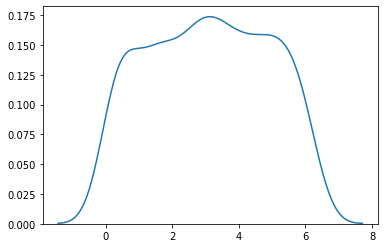

In [309]:
a, b = 0.5, 0.5
omega = np.random.beta(a,b, size=1000)
sns.kdeplot(2*pi*omega)

/Users/rabeya/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:335: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)


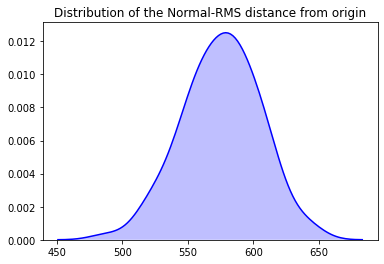

/Users/rabeya/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:335: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)


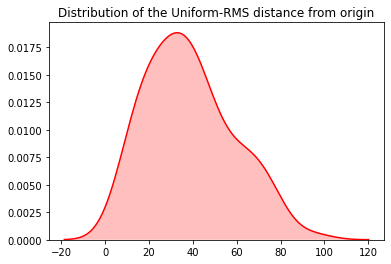

In [286]:
# creating distances 

T, n = 100, 2000

normal_rms = []
for k in tqdm_notebook(range(1,T+1), desc='{0} Polar Normal Walks of length {1}'.format(T, n)):
    theta_mean = pi/4
    theta_loc = np.pi/2
    s, t = normal_polar_walk(n, theta_mean,theta_loc, True)
    normal_rms.append(sqrt(s[-1]**2 + t[-1]**2))
    time.sleep(0.0001)

sns.kdeplot(normal_rms, shade=True, c='b')
plt.title('Distribution of the Normal-RMS distance from origin')
plt.show()


    
    

uniform_rms = []
for k in tqdm_notebook(range(1,T+1), desc='{0} Polar Uniform Walks of length {1}'.format(T, n)):
    theta_mean = pi/4
    theta_loc = np.pi/2
    x, y = uniform_polar_walk(n, theta_mean, theta_loc, True)
    uniform_rms.append(sqrt(x[-1]**2 + y[-1]**2))
    time.sleep(0.0001)

sns.kdeplot(uniform_rms, shade=True, c='r')
plt.title('Distribution of the Uniform-RMS distance from origin')
plt.show()
    

In [269]:
np.mean(uniform_rms), np.std(uniform_rms)

(52.526595417046885, 29.260666801196326)

In [270]:
np.mean(normal_rms), np.std(normal_rms)

(881.0317674307847, 33.811325877628555)

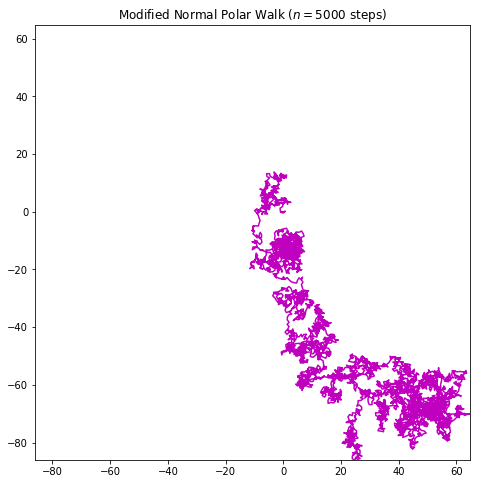

In [162]:
def modified_normal_polar_walk(n):
    # n = # of steps 
    u = np.zeros(n)
    v = np.zeros(n)

    for k in tqdm_notebook(range(1, n), desc='Walking {} Modified Normal Steps'.format(n) ):
        if ( (max(u) < 100.0) or (min(u) > -100.0) or (max(v) < 100.0) or (min(v) > -100.0) ):
            # choose theta normal-dist between -pi and pi 
            theta = np.random.normal(0, np.pi)
            # then set x = cos(angle), y = sin(angle)
            u_new = np.cos(theta)
            v_new = np.sin(theta)
            # finally add x to the preious x and update
            u[k] = u[k-1]+u_new
            # same with y
            v[k] = v[k-1]+v_new 
        else:
            # choose theta normal-dist between -pi and pi 
            theta = np.random.normal(0, np.pi/2)
            # then set x = cos(angle), y = sin(angle)
            u_new = np.cos(theta)
            v_new = np.sin(theta)
            # finally add x to the preious x and update
            u[k] = u[k-1]+u_new
            # same with y
            v[k] = v[k-1]+v_new
        
        time.sleep(0.001)
        
    return u,v





#plotting stuff:
n = 5000
u, v = modified_normal_polar_walk(n)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.plot(u, v, c='m',)
plt.xlim([min(min(u),min(v)), max(max(u),max(v))])
plt.ylim([min(min(u),min(v)), max(max(u),max(v))])


plt.title("Modified Normal Polar Walk ($n = " + str(n) + "$ steps)")
plt.show()

In [165]:
max(u),max(v)

(64.72333087276297, 13.774625167551045)

In [166]:
min(u),min(v)

(-11.578066592764825, -85.95327888702207)

/Users/rabeya/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:335: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)


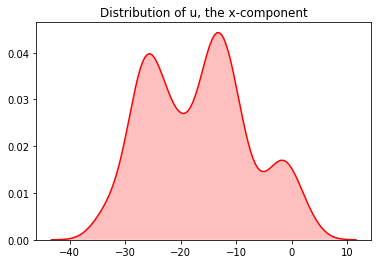

In [81]:
sns.kdeplot(u, shade=True, c='r')
plt.title('Distribution of u, the x-component')
plt.show()

/Users/rabeya/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:335: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)


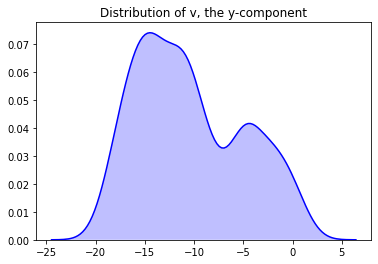

In [82]:
sns.kdeplot(v, shade=True, c='b')
plt.title('Distribution of v, the y-component')
plt.show()

In [256]:


# repeat the random walk 100 times, gather the distances d
# then plot the distribution of d

def plot_RMS(T, n):
    rms_d = []
    for k in tqdm_notebook(range(1,T+1), desc='{0} Polar Random Walks of length {1}'.format(T, n)):
        x, y = polar_random_walk(n)
        rms_d.append(sqrt(x[-1]**2 + y[-1]**2))

    sns.kdeplot(rms_d, shade=True, c='r')
    plt.title('Smoothed KDE Distribution of the RMS distance from origin')
    plt.show()

/Users/rabeya/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:335: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)


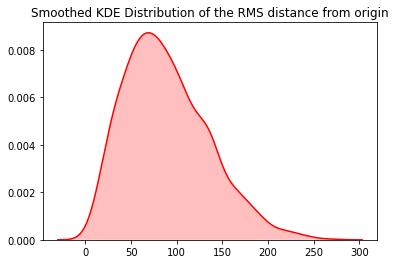

In [268]:
plot_RMS(2000, 10000)